In [2]:
import numpy as np
import pandas as pd
import os as os
import time



In [3]:
os.chdir('../')

In [4]:
%pylab inline
exec(open("./run_model.py").read())
exec(open("./get_signal_names.py").read())
exec(open("./portfolio_optimizer.py").read())

import datetime
from pylab import rcParams


Populating the interactive namespace from numpy and matplotlib


In [4]:
#sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'
#fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/'
#fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv'

use_rank = False

sig_dir = '../afp_data/rank/0_3000/rps_data/'
fac_data_dir='../afp_data/rank/0_3000/factor_exposure_data/'
fac_ret_file = '../afp_data/rank/0_3000/fac_ret_file.csv'

if not use_rank:
    sig_dir = '../afp_data/norm/0_3000//rps_data/'
    fac_data_dir='../afp_data/norm/0_3000/factor_exposure_data/'
    fac_ret_file = '../afp_data/norm/0_3000/fac_ret_file.csv'
    

In [5]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)

for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    sig_df = sig_df.append(this_df)
data = sig_df.copy()

1980-01-31.csv
1980-02-29.csv
1980-03-31.csv
1980-04-30.csv
1980-05-30.csv
1980-06-30.csv
1980-07-31.csv
1980-08-29.csv
1980-09-30.csv
1980-10-31.csv
1980-11-28.csv
1980-12-31.csv
1981-01-30.csv
1981-02-27.csv
1981-03-31.csv
1981-04-30.csv
1981-05-29.csv
1981-06-30.csv
1981-07-31.csv
1981-08-31.csv
1981-09-30.csv
1981-10-30.csv
1981-11-30.csv
1981-12-31.csv
1982-01-29.csv
1982-02-26.csv
1982-03-31.csv
1982-04-30.csv
1982-05-28.csv
1982-06-30.csv
1982-07-30.csv
1982-08-31.csv
1982-09-30.csv
1982-10-29.csv
1982-11-30.csv
1982-12-31.csv
1983-01-31.csv
1983-02-28.csv
1983-03-31.csv
1983-04-29.csv
1983-05-31.csv
1983-06-30.csv
1983-07-29.csv
1983-08-31.csv
1983-09-30.csv
1983-10-31.csv
1983-11-30.csv
1983-12-30.csv
1984-01-31.csv
1984-02-29.csv
1984-03-30.csv
1984-04-30.csv
1984-05-31.csv
1984-06-29.csv
1984-07-31.csv
1984-08-31.csv
1984-09-28.csv
1984-10-31.csv
1984-11-30.csv
1984-12-31.csv
1985-01-31.csv
1985-02-28.csv
1985-03-29.csv
1985-04-30.csv
1985-05-31.csv
1985-06-28.csv
1985-07-31

In [6]:
#model_name = 'linear_regression'
#train_model_arg = { 'fit_intercept':True }

model_name = 'knn'
train_model_arg = None



In [7]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]
sig_df = sig_df.fillna(sig_df.mean())

In [8]:
'res_ret' in sig_df.columns

True

In [9]:
#factor_names =  ['beta','mve', 'bm', 'roic', 'agr', 'mom12m', 'idiovol']
factor_names =  ['beta']
sig_names = get_signal_names()
ret_sr = sig_df['ret']
sig_df = sig_df[sig_names]
sig_df = sig_df.drop(factor_names, axis=1)
sig_df = sig_df.drop(['idiovol'], axis=1)

In [10]:
pm = PortfolioOptimizer(fac_data_dir=fac_data_dir,
                        fac_ret_file = fac_ret_file,
                        fac_cov_hl = 12.0,
                        fac_names = None
                       )

--------


In [11]:



pnl_df = pd.DataFrame()


#these_signals = ['mve', 'bm', 'roic', 'agr', 'mom12m',]
these_signals = sig_df.columns
sig_signs = get_signal_signs()

for sig_name in these_signals :
    print(sig_name)
    
    try :
        t0 = time.time()
        #print(sig_name)
        this_sign = sig_signs[sig_name]
        this_sig_sr = sig_df[ [sig_name] ].copy()*np.sign(this_sign)
        
        #unmodified signal
        pnl_sr = pm.run_signal(this_sig_sr.iloc[:,0], neu_sig=True)
        pnl_df[sig_name] = pnl_sr
        print(pnl_sr.mean()*sqrt(12.0)/pnl_sr.std())
        
        
    except Exception as e :
        print(e)

absacc
-----------
0.539982482036
acc
-----------
0.131659370139
aeavol
-----------
0.641392537561
age
-----------
0.775068436709
agr
-----------
1.36511453811
baspread
-----------
1.33680939328
betasq
-----------
0.495814411642
bm
-----------
0.480014690668
bm_ia
-----------
0.349568219968
cash
-----------
0.427639063475
cashdebt
-----------
0.476386015455
cashpr
-----------
0.70696399712
cfp
-----------
1.05751119933
cfp_ia
-----------
0.405128484905
chatoia
-----------
0.624190093888
chcsho
-----------
0.995653549091
chempia
-----------
0.224723717537
chfeps
-----------
0.73478038917
chinv
-----------
1.04487577782
chmom
-----------
0.550742745122
chnanalyst
-----------
0.173728055885
chpmia
-----------
0.220072072861
chtx
-----------
0.0605300805943
cinvest
-----------
0.193859399795
convind
-----------
0.634040008644
currat
-----------
0.917447692574
depr
-----------
0.352947983555
disp
-----------
1.01784889719
divi
-----------
0.691839164303
orgcap
-----------
0.300565869678
pch

In [14]:
pnl_df = pd.read_csv('./../afp_results/signed_signal_pnl_df.csv',index_col = 'Unnamed: 0')
pnl_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d')for val in pnl_df.index]

1.25035849574


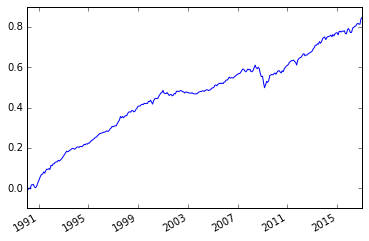

In [15]:
x = pnl_df[['mve', 'bm', 'roic', 'agr', 'mom12m',]]
print( x.mean(axis=1).mean()*sqrt(12)/x.mean(axis=1).std() )
x.mean(axis=1).cumsum().plot()

1.37484937459


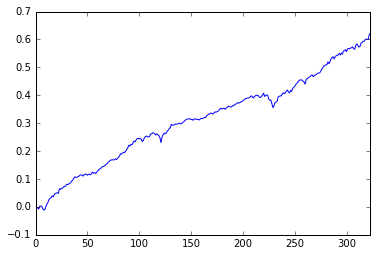

In [8]:
x = pnl_df
print( x.mean(axis=1).mean()*sqrt(12)/x.mean(axis=1).std() )
x.mean(axis=1).cumsum().plot()

In [11]:
look_back = 1

knn_sig_df = pd.DataFrame()
lm_sig_df = pd.DataFrame()
kernel_sig_df = pd.DataFrame()

pnl_df = pd.DataFrame()
lm_pnl_df = pd.DataFrame()
knn_pnl_df = pd.DataFrame()
#kernel_pnl_df = pd.DataFrame()

shrp_df = pd.DataFrame()

#these_signals = ['mve', 'bm', 'roic', 'agr', 'mom12m',]
these_signals = sig_df.columns

for sig_name in these_signals :
    print(sig_name)
    
    try :
        t0 = time.time()
        
        this_sig_sr = sig_df[ [sig_name] ].copy()
        #unmodified signal
        pnl_sr = pm.run_signal(this_sig_sr.iloc[:,0], neu_sig=True)
        pnl_df[sig_name] = pnl_sr
        
        #linear signal
        print('lm')
        lm_sig_sr,mvc = run_model( this_sig_sr, ret_sr, model_name='linear_regression', train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = 0.0)
        lm_sig_df[sig_name] = lm_sig_sr
        lm_pnl_sr = pm.run_signal(lm_sig_sr, neu_sig=True)
        lm_pnl_df[sig_name] = lm_pnl_sr
        
        #knn signal
        print('knn')
        knn_sig_sr,mvc = run_model( this_sig_sr, ret_sr, model_name='knn', train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = 0.0)
        knn_sig_df[sig_name] = knn_sig_sr   
        knn_pnl_sr = pm.run_signal(knn_sig_sr, neu_sig=True)
        knn_pnl_df[sig_name] = knn_pnl_sr
        
        #kernel signal
        #print('kernel')
        #kernel_sig_sr,mvc = run_model( this_sig_sr, ret_sr, model_name='ridge_kernel', train_model_arg=train_model_arg, 
        #                  pred_model_arg ={},look_back=look_back, sample_decay = 0.5)
        #kernel_sig_df[sig_name] = kernel_sig_sr   
        #kernel_pnl_sr = pm.run_signal(kernel_sig_sr, neu_sig=True)
        #kernel_pnl_df[sig_name] = kernel_pnl_sr
        
        
        s1 = pnl_sr.mean()*sqrt(12)/ pnl_sr.std()
        s2 = lm_pnl_sr.mean()*sqrt(12)/ lm_pnl_sr.std()
        s3 = knn_pnl_sr.mean()*sqrt(12)/ knn_pnl_sr.std()
        #s4  = kernel_pnl_sr.mean()*sqrt(12)/ kernel_pnl_sr.std()
        
        #this_shrp = pd.Series([s1,s2,s3,s4], index=['org', 'lm', 'knn', 'kernel'], name = sig_name)
        this_shrp = pd.Series([s1,s2,s3], index=['org', 'lm', 'knn',], name = sig_name)
        shrp_df = shrp_df.append(this_shrp)
        
        t1 = time.time()
        this_time = t1-t0
        print('time = ' + str(this_time)) 
        print(this_shrp)
        
    except Exception as e :
        print(e)

absacc
-----------
lm
-----------
-----------
knn
-----------
-----------
time = 108.44980001449585
org   -0.539982
lm     0.287318
knn    0.375253
Name: absacc, dtype: float64
acc
-----------
lm
-----------
-----------
knn
-----------
-----------
time = 99.65317106246948
org   -0.131659
lm     0.162289
knn    0.430141
Name: acc, dtype: float64
aeavol
-----------
lm
-----------
-----------
knn
-----------
-----------
time = 96.60512399673462
org   -0.641393
lm     0.131609
knn   -0.073818
Name: aeavol, dtype: float64
age
-----------
lm
-----------
-----------
knn
-----------
-----------
time = 110.94363903999329
org    0.775068
lm     0.487222
knn    0.374991
Name: age, dtype: float64
agr
-----------
lm
-----------
-----------
knn
-----------
-----------
time = 93.84954118728638
org   -1.365115
lm     0.396654
knn    0.360856
Name: agr, dtype: float64
baspread
-----------
lm
-----------
-----------
knn
-----------
-----------
time = 90.9883918762207
org   -1.336809
lm     0.331403
knn 

In [12]:
shrp_df = shrp_df.sort_values( ['knn'], ascending=False)
shrp_df.to_csv('/Users/raghuramkowdeed/Desktop/knn_signals_'+str(look_back)+ '.csv')

In [14]:
shrp_df

,knn,lm,org
ms,0.843259,0.917445,0.780798
herf,0.842004,0.224564,-0.827333
cfp,0.794532,0.438300,1.057511
lev,0.771195,0.508072,0.513723
sfe,0.767397,0.363783,0.148985
tang,0.738689,0.378134,-0.373120
bm,0.732004,0.702960,0.480015
grcapx,0.725053,0.449117,-1.565139
gma,0.713290,0.314834,-0.492503
ps,0.705647,0.304120,0.542817


In [13]:
these_signals = ['mve', 'bm', 'roic', 'agr', 'mom12m',]


In [13]:
lm_sig_sr,mvc = run_model( sig_df[these_signals], ret_sr, model_name='linear_regression', train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=6, sample_decay = 0.5)
lm_pnl_sr = pm.run_signal(lm_sig_sr, neu_sig=True)

1990-07-31 00:00:00
1990-08-31 00:00:00
1990-09-28 00:00:00
1990-10-31 00:00:00
1990-11-30 00:00:00
1990-12-31 00:00:00
1991-01-31 00:00:00
1991-02-28 00:00:00
1991-03-28 00:00:00
1991-04-30 00:00:00
1991-05-31 00:00:00
1991-06-28 00:00:00
1991-07-31 00:00:00
1991-08-30 00:00:00
1991-09-30 00:00:00
1991-10-31 00:00:00
1991-11-29 00:00:00
1991-12-31 00:00:00
1992-01-31 00:00:00
1992-02-28 00:00:00
1992-03-31 00:00:00
1992-04-30 00:00:00
1992-05-29 00:00:00
1992-06-30 00:00:00
1992-07-31 00:00:00
1992-08-31 00:00:00
1992-09-30 00:00:00
1992-10-30 00:00:00
1992-11-30 00:00:00
1992-12-31 00:00:00
1993-01-29 00:00:00
1993-02-26 00:00:00
1993-03-31 00:00:00
1993-04-30 00:00:00
1993-05-28 00:00:00
1993-06-30 00:00:00
1993-07-30 00:00:00
1993-08-31 00:00:00
1993-09-30 00:00:00
1993-10-29 00:00:00
1993-11-30 00:00:00
1993-12-31 00:00:00
1994-01-31 00:00:00
1994-02-28 00:00:00
1994-03-31 00:00:00
1994-04-29 00:00:00
1994-05-31 00:00:00
1994-06-30 00:00:00
1994-07-29 00:00:00
1994-08-31 00:00:00


In [15]:
knn_sig_sr,mvc = run_model( sig_df[these_signals], ret_sr, model_name='knn', train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=6, sample_decay = 0.5)
knn_pnl_sr = pm.run_signal(knn_sig_sr, neu_sig=True)

1990-07-31 00:00:00
1990-08-31 00:00:00
1990-09-28 00:00:00
1990-10-31 00:00:00
1990-11-30 00:00:00
1990-12-31 00:00:00
1991-01-31 00:00:00
1991-02-28 00:00:00
1991-03-28 00:00:00
1991-04-30 00:00:00
1991-05-31 00:00:00
1991-06-28 00:00:00
1991-07-31 00:00:00
1991-08-30 00:00:00
1991-09-30 00:00:00
1991-10-31 00:00:00
1991-11-29 00:00:00
1991-12-31 00:00:00
1992-01-31 00:00:00
1992-02-28 00:00:00
1992-03-31 00:00:00
1992-04-30 00:00:00
1992-05-29 00:00:00
1992-06-30 00:00:00
1992-07-31 00:00:00
1992-08-31 00:00:00
1992-09-30 00:00:00
1992-10-30 00:00:00
1992-11-30 00:00:00
1992-12-31 00:00:00
1993-01-29 00:00:00
1993-02-26 00:00:00
1993-03-31 00:00:00
1993-04-30 00:00:00
1993-05-28 00:00:00
1993-06-30 00:00:00
1993-07-30 00:00:00
1993-08-31 00:00:00
1993-09-30 00:00:00
1993-10-29 00:00:00
1993-11-30 00:00:00
1993-12-31 00:00:00
1994-01-31 00:00:00
1994-02-28 00:00:00
1994-03-31 00:00:00
1994-04-29 00:00:00
1994-05-31 00:00:00
1994-06-30 00:00:00
1994-07-29 00:00:00
1994-08-31 00:00:00


In [19]:
lm_pnl_sr.mean()*sqrt(12)/lm_pnl_sr.std()

0.84933166693063811

In [20]:
knn_pnl_sr.mean()*sqrt(12)/knn_pnl_sr.std()

0.76076126923616927

In [21]:
pnl_df = pd.DataFrame()
pnl_df['lm'] = lm_pnl_sr
pnl_df['gb'] = knn_pnl_sr

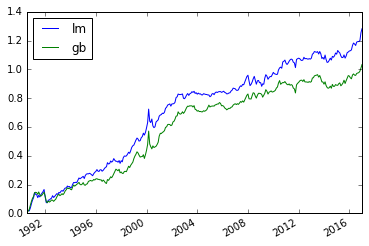

In [22]:
pnl_df.cumsum().plot()